In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Reading the file we are going to work on

In [6]:
customer=pd.read_csv("data.csv")

In [7]:
customer.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [8]:
customer.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


# Plotting graphs for better understanding

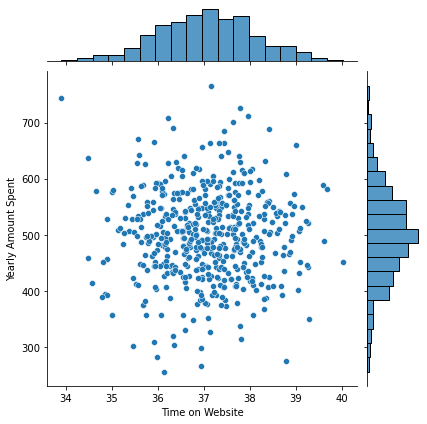

In [12]:
sns.jointplot(data=customer,x="Time on Website",y="Yearly Amount Spent")

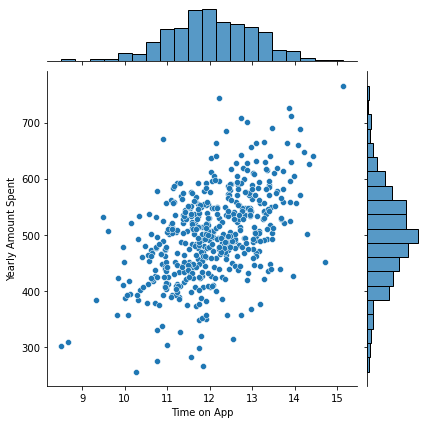

In [13]:
sns.jointplot(data=customer,x="Time on App",y="Yearly Amount Spent")

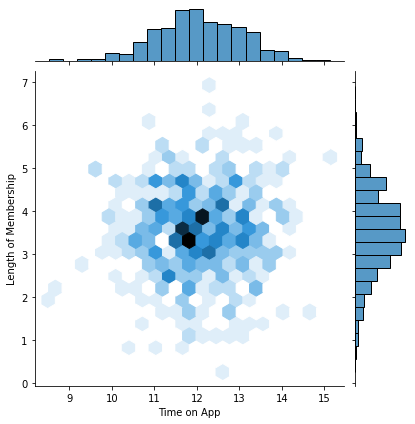

In [14]:
sns.jointplot(data=customer,x="Time on App",y="Length of Membership",kind="hex")

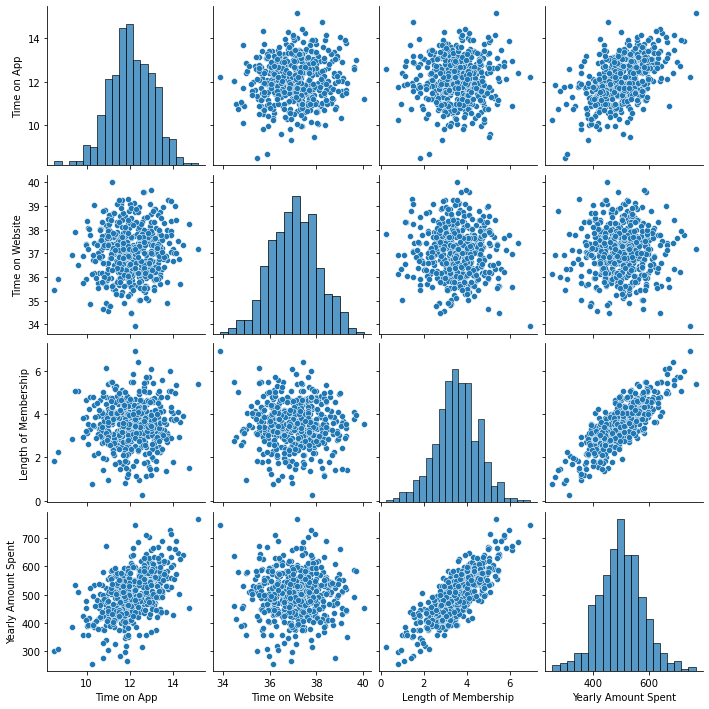

In [15]:
sns.pairplot(customer)

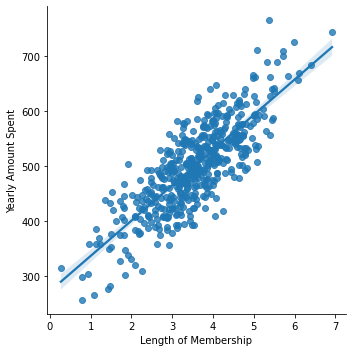

In [16]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=customer)

In [17]:
customer.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Applying main logic for the linear regression model

In [18]:
y=customer['Yearly Amount Spent']

In [19]:
X=customer[['Time on App', 'Time on Website',
       'Length of Membership']]

In [21]:
from sklearn.model_selection import train_test_split

# Training and Testing the model using scikit-learn

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm= LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
lm.coef_

array([36.73506185,  1.06976162, 62.09959533])

# Making prediction based on data

In [29]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'predicted values')

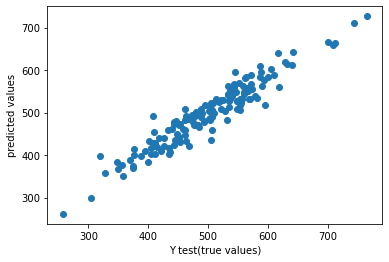

In [35]:
plt.scatter(y_test,predictions)
plt.xlabel("Y test(true values)")
plt.ylabel("predicted values")

In [36]:
from sklearn import metrics

In [37]:
print("MAE",metrics.mean_absolute_error(y_test,predictions))
print("MSE",metrics.mean_squared_error(y_test,predictions))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 20.68662778076648
MSE 678.3961717781165
RMSE 26.046039464343067


In [38]:
metrics.explained_variance_score(y_test,predictions)

0.9068561842704586

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

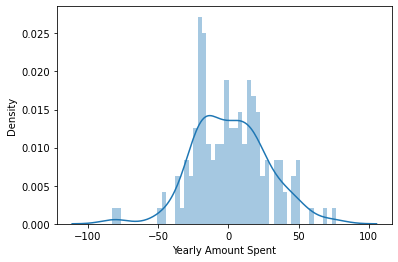

In [39]:
sns.distplot((y_test-predictions),bins=50)

In [41]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Time on App,36.735062
Time on Website,1.069762
Length of Membership,62.099595
